In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel (r'BASE DE DATOS TESIS ACNE.xlsx')

In [13]:
df = df.drop(df.index[[9,10]])

In [14]:
df

,Registro,Apellido1,Apellido2,Nombre,Fecha de nacimiento,Edad,Sexo,Sesiones Previas,Antecedente familiar,Unnamed: 9,...,SCARS inicial,SCARS fin,ECCA inicial,ECCA final,FASQOL inicial,FASQOL fin,UDE basal,UDE control,DERMIS basal,DERMIScontrol
0,794818,García,del Motte,Melissa,NaN,18.0,0,NaN,NaN,NaN,...,3.0,3.0,110.0,110.0,NaN,NaN,41.6,20.8,67.7,62.50
1,860605,Valencia,NaN,Alejandro,NaN,15.0,1,NaN,NaN,NaN,...,4.0,3.0,210.0,190.0,NaN,NaN,45.7,37.1,91.4,68.00
2,859534,Hernandez,Buendia,Maria Fernanda,NaN,13.0,0,NaN,,NaN,...,3.0,3.0,90.0,75.0,NaN,NaN,67.7,57.8,114.5,94.40
3,854585,Arenas,Dominguez,Andres,NaN,17.0,1,NaN,NaN,NaN,...,4.0,3.0,165.0,120.0,NaN,NaN,212.8,169.7,285.8,201.30
4,801512,Islas,Mora,Maria Fernanda,NaN,17.0,0,NaN,NaN,NaN,...,3.0,3.0,90.0,75.0,NaN,NaN,88.5,83.3,119.7,93.74
5,819207,Marín,Saavedra,Adolfo Daniel,NaN,16.0,1,NaN,NaN,NaN,...,2.0,2.0,90.0,90.0,NaN,NaN,78.1,36.4,109.3,62.50
6,839619,Hernandez,Hernandez,Nallely,NaN,17.0,0,NaN,NaN,NaN,...,3.0,2.0,95.0,65.0,NaN,NaN,57.3,57.3,124.9,83.30
7,769921,Oloarte,Garcia,Angel,,15.0,1,NaN,NaN,NaN,...,3.0,3.0,205.0,135.0,NaN,NaN,35.1,31.2,144.5,124.90
8,806358,Quinto,Gonzalez,Aldo sebastian,NaN,14.0,1,NaN,NaN,NaN,...,3.0,2.0,150.0,95.0,NaN,NaN,36.4,41.6,109.3,109.30


In [16]:
df.keys()

Index(['Registro ', 'Apellido1', 'Apellido2', 'Nombre', 'Fecha de nacimiento',
       'Edad ', 'Sexo', 'Sesiones Previas', 'Antecedente familiar',
       'Unnamed: 9', 'Unnamed: 10', 'áreas afectadas', 'Unnamed: 12',
       'SCARS inicial', 'SCARS fin', 'ECCA inicial', 'ECCA final',
       'FASQOL inicial', 'FASQOL fin', 'UDE basal', 'UDE control',
       'DERMIS basal', 'DERMIScontrol'],
      dtype='object')

In [17]:
df['Edad ']

0    18.0
1    15.0
2    13.0
3    17.0
4    17.0
5    16.0
6    17.0
7    15.0
8    14.0
Name: Edad , dtype: float64

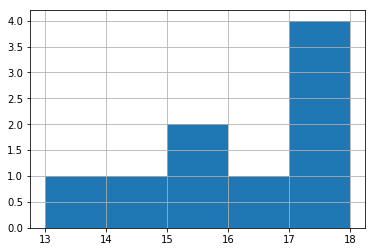

In [23]:
df['Edad '].hist(bins =5)